In [61]:

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import kneighbors_graph
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [62]:
iris=sns.load_dataset('iris')
features=iris.columns[:4]
target=iris.columns[4]

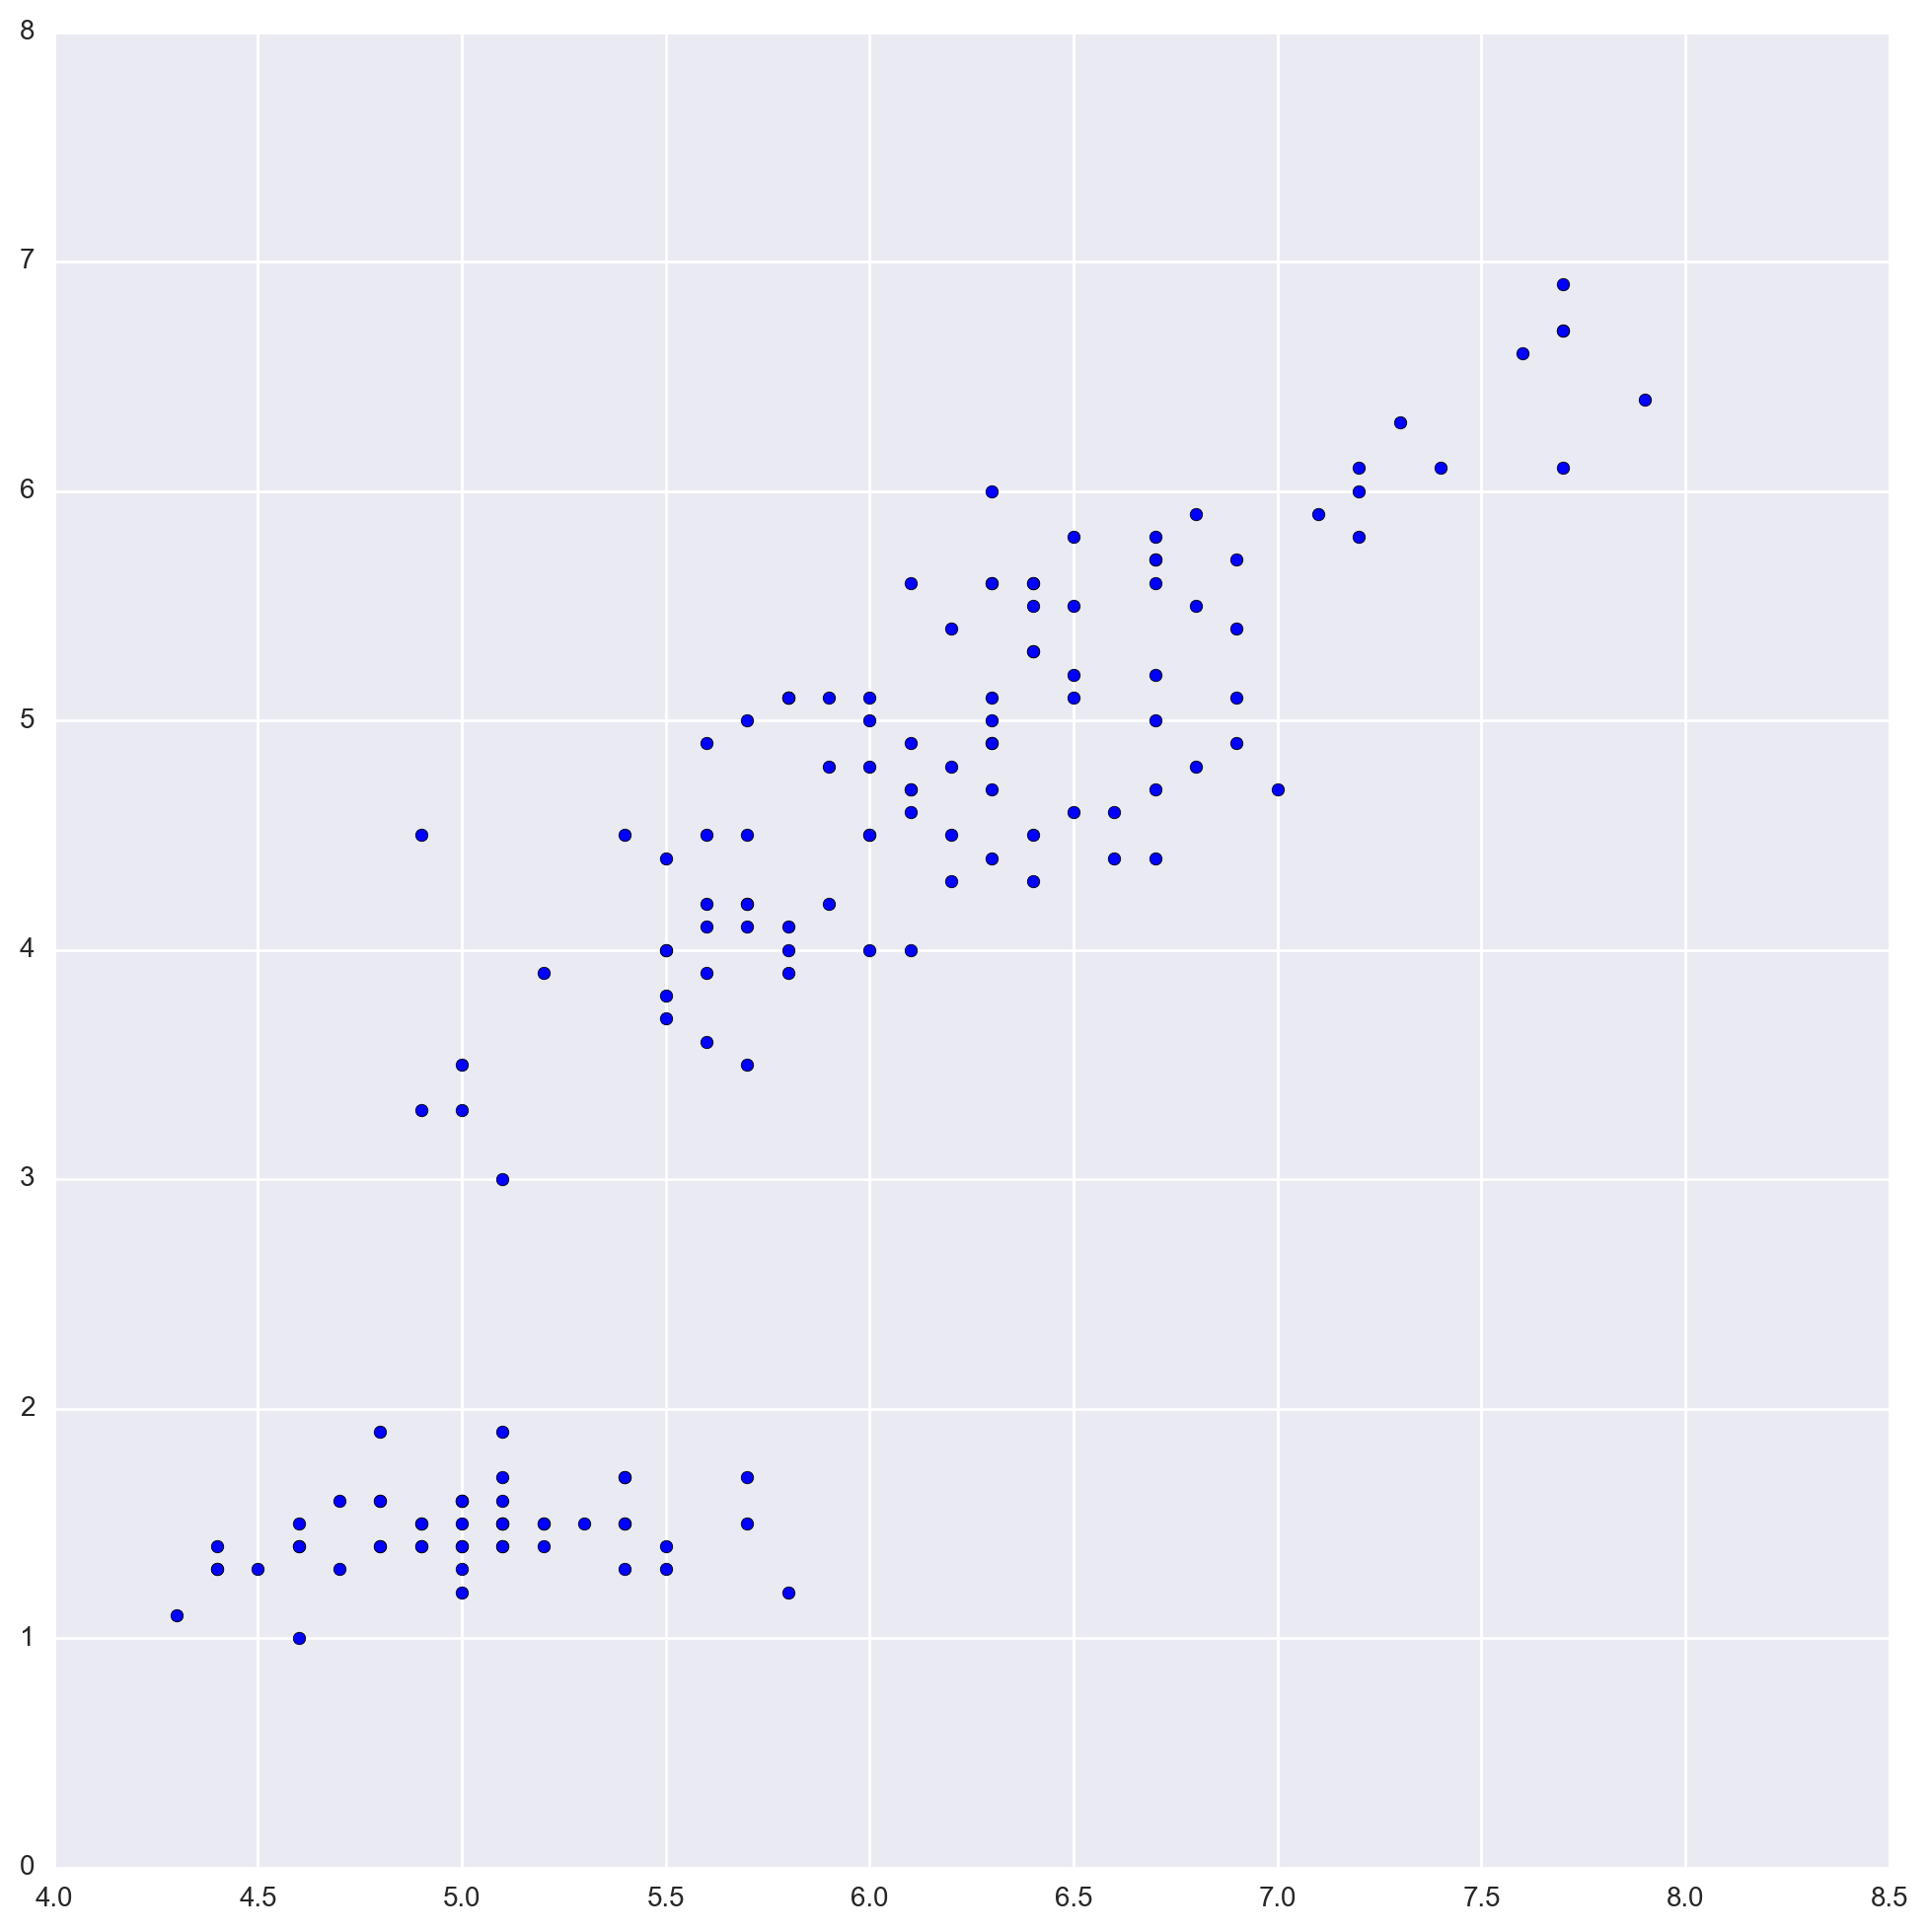

In [69]:
plt.figure(figsize=(12,12))
plt.scatter(iris[features[0]],iris[features[2]])
plt.show()

In [70]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
iris[target]=encoder.fit_transform(iris[target])

In [71]:
W = linkage(iris, 'ward')
C = linkage(iris, 'complete')
A= linkage(iris, 'average')

In [72]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(iris))
c
coph_dists

array([ 3.82805262,  3.82805262,  3.82805262, ...,  1.5568332 ,
        4.12849678,  4.12849678])

In [79]:
def fancy_dendrogram(*args, **kwargs):
    plt.figure(figsize=(10,10))
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata


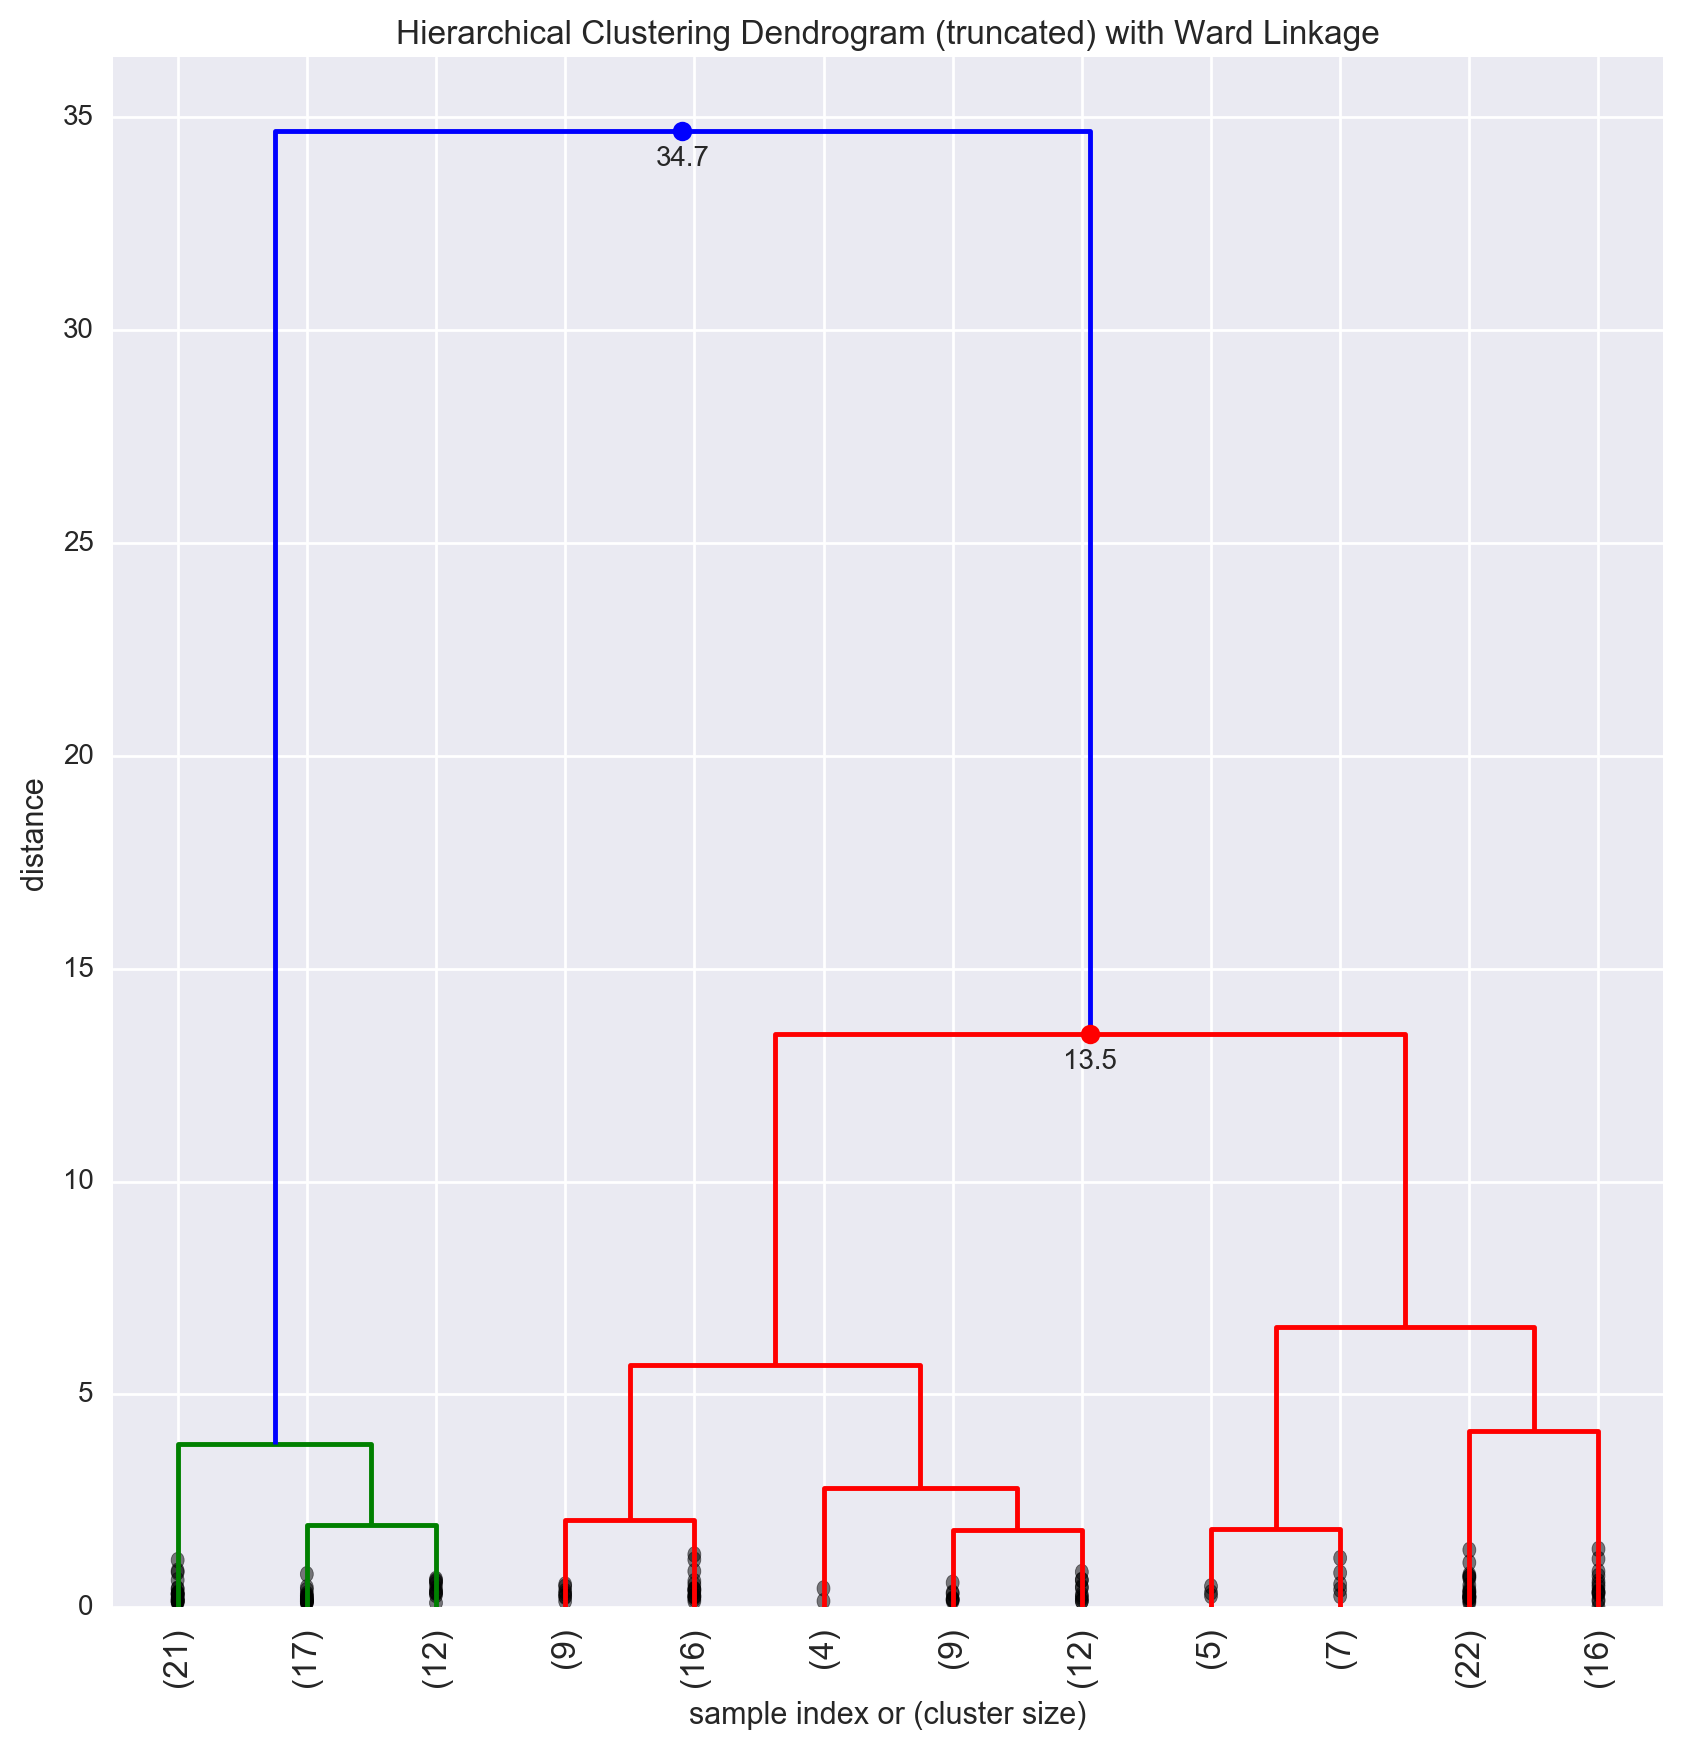

In [80]:
fancy_dendrogram(
    W,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.title('Hierarchical Clustering Dendrogram (truncated) with Ward Linkage')
plt.show()

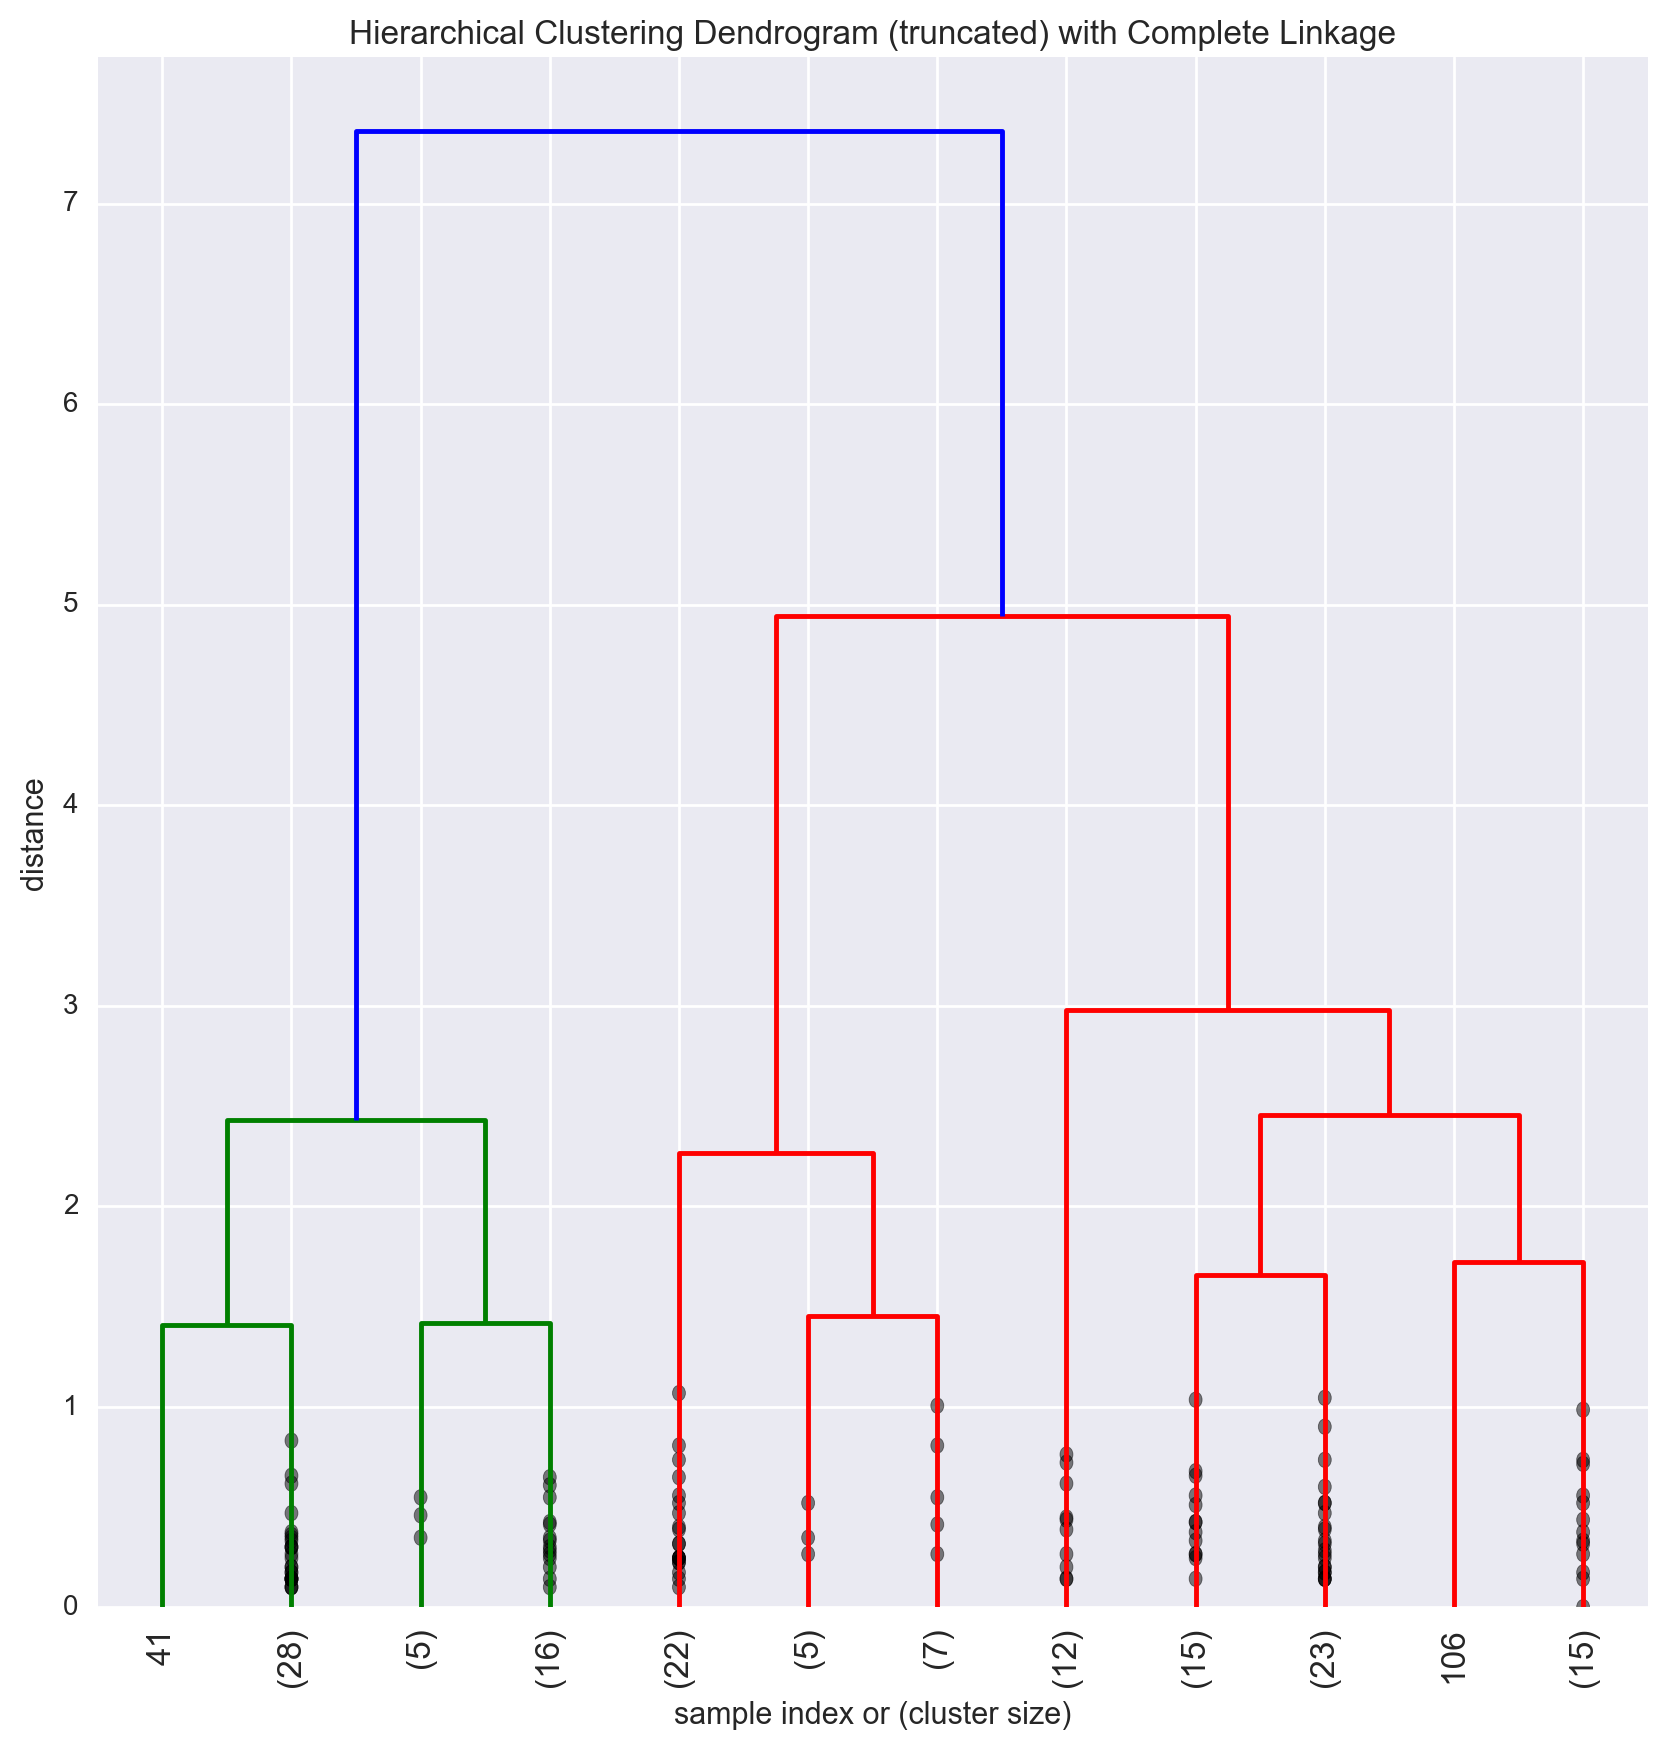

In [81]:
fancy_dendrogram(
    C,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    # useful in small plots so annotations don't overlap
)
plt.title('Hierarchical Clustering Dendrogram (truncated) with Complete Linkage')
plt.show()

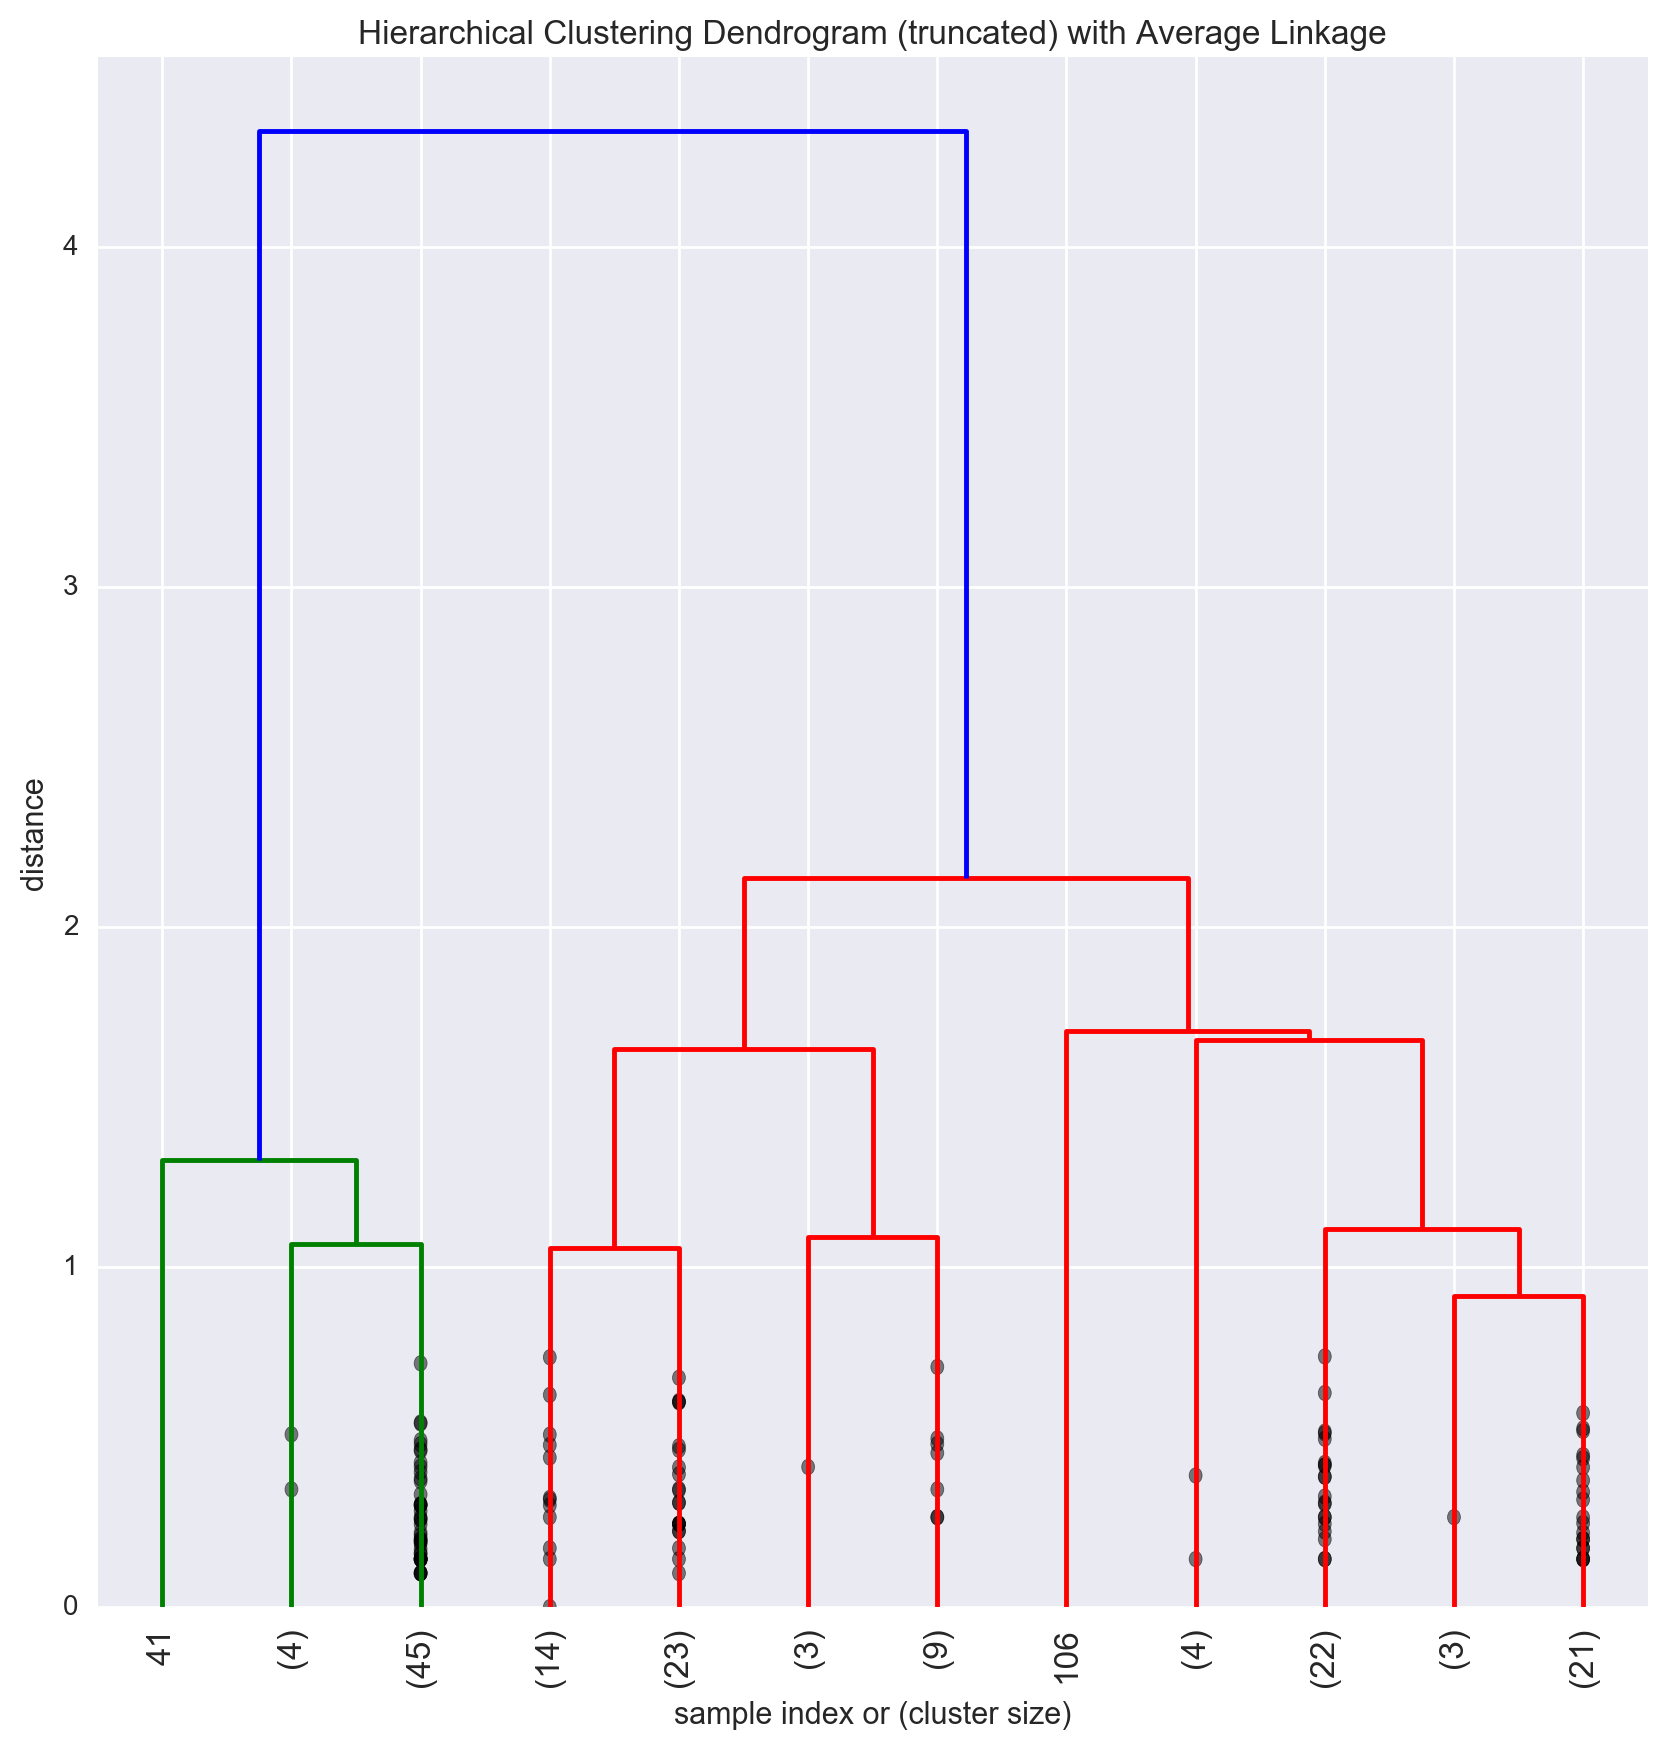

In [82]:
fancy_dendrogram(
    A,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.title('Hierarchical Clustering Dendrogram (truncated) with Average Linkage')
plt.show()

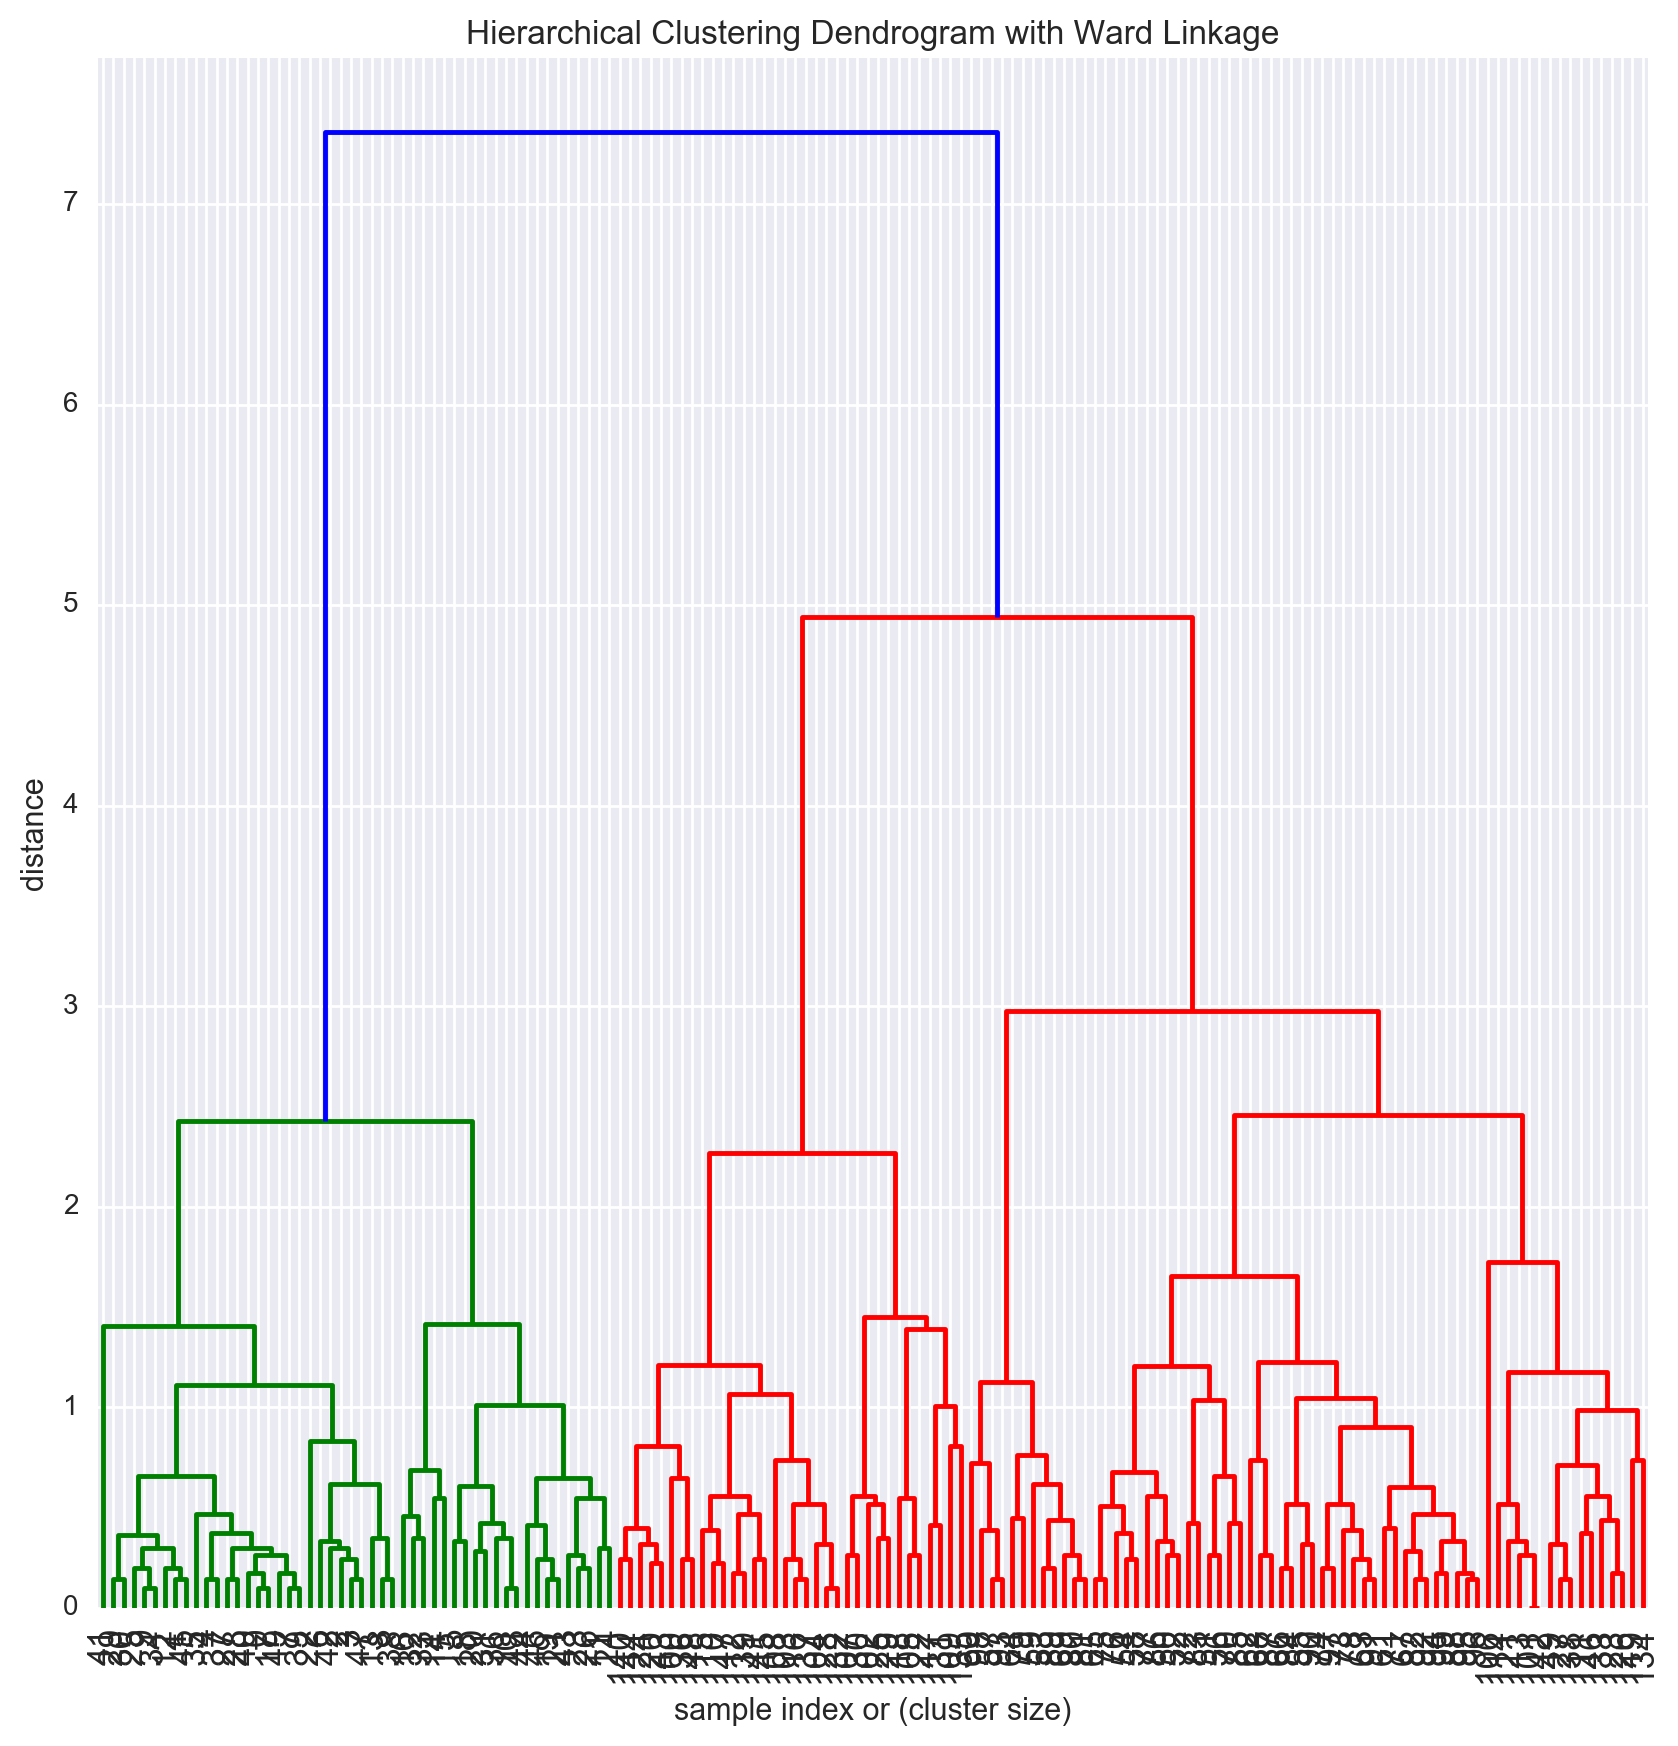

In [83]:
fancy_dendrogram(
    C,
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    # useful in small plots so annotations don't overlap
)
plt.title('Hierarchical Clustering Dendrogram with Ward Linkage')
plt.show()